<a href="https://colab.research.google.com/github/DaVieci/school-success-prediction/blob/main/School_Success_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# School Success Prediction

## Daten einlesen

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
studium_df = pd.read_csv("DP13.csv", sep=";")
studium_df

,Qualifikation,Schnitt,Bundesland,Mathe,Physik,Deutsch,Schultyp,OLT-Mathe,OLT-Deutsch,Studierfähigkeitstest,Alter,Geschlecht,Jahreseinkommen der Eltern,Staatsbürgerschaft,Studiengang,Abschluss
0,Abitur,"2,3",Baden-Württemberg,"1,9","2,8","2,3",Allgemeinbildendes Gymnasium,51,43,709,19,m,49670,deutsch,Maschinenbau,"3,3"
1,Abitur,"1,3",Baden-Württemberg,"2,3","3,1",1,Technisches Gymnasium,71,77,901,19,w,53870,deutsch,Wirtschaftswissenschaften,"2,8"
2,Abitur,"1,6",Baden-Württemberg,"1,6","1,7","2,8",Allgemeinbildendes Gymnasium,64,47,n.a.,17,w,107690,deutsch,Wirtschaftswissenschaften,"2,3"
3,Abitur,"1,7",Bayern,"1,5","1,6","2,7",Allgemeinbildendes Gymnasium,83,62,n.a.,17,m,147830,deutsch,Maschinenbau,"1,7"
4,FH Reife,"1,1",Sachsen,keine,keine,keine,n.a.,42,60,746,22,m,54840,deutsch,Informatik,"3,4"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Abitur,"1,4",Baden-Württemberg,1,"1,3","1,3",Wirtschaftsgymnasium,96,75,n.a.,18,w,130750,deutsch,Soziale Arbeit,"1,2"
96,Abitur,1,Baden-Württemberg,"1,9","2,7","1,9",Technisches Gymnasium,70,61,n.a.,17,m,130650,deutsch,Elektrotechnik,"2,6"
97,Abitur,"1,4",Bayern,2,"2,1","1,4",Wirtschaftsgymnasium,65,82,n.a.,17,m,102800,deutsch,Elektrotechnik,"2,3"
98,FH Reife,"2,9",Baden-Württemberg,keine,keine,keine,n.a.,18,19,744,17,w,49050,Non European,Maschinenbau,abgebrochen


In [ ]:
studium_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Qualifikation               100 non-null    object
 1   Schnitt                     100 non-null    object
 2   Bundesland                  100 non-null    object
 3   Mathe                       100 non-null    object
 4   Physik                      100 non-null    object
 5   Deutsch                     100 non-null    object
 6   Schultyp                    100 non-null    object
 7   OLT-Mathe                   100 non-null    int64 
 8   OLT-Deutsch                 100 non-null    int64 
 9   Studierfähigkeitstest       100 non-null    object
 10  Alter                       100 non-null    int64 
 11  Geschlecht                  100 non-null    object
 12  Jahreseinkommen der Eltern  100 non-null    int64 
 13  Staatsbürgerschaft          100 non-null    object


In [ ]:
for column in studium_df.columns:
  print(column + str(studium_df[column].sort_values().unique()) + '\n')

Qualifikation['Abitur' 'FH Reife' 'Meister' 'Techniker']

Schnitt['1' '1,1' '1,2' '1,3' '1,4' '1,5' '1,6' '1,7' '1,8' '1,9' '2' '2,1' '2,2'
 '2,3' '2,4' '2,5' '2,6' '2,7' '2,8' '2,9' '3' '3,4' '3,7']

Bundesland['Baden-Württemberg' 'Bayern' 'Bremen' 'Nordrhein-Westfalen'
 'Rheinland-Pfalz' 'Sachsen' 'Schleswig-Holstein' 'Thüringen']

Mathe['1' '1,1' '1,2' '1,3' '1,4' '1,5' '1,6' '1,7' '1,8' '1,9' '2' '2,1' '2,2'
 '2,3' '2,5' '2,6' '2,7' '2,8' '2,9' '3,1' '3,8' 'keine']

Physik['1' '1,1' '1,2' '1,3' '1,4' '1,5' '1,6' '1,7' '1,8' '1,9' '2,1' '2,2'
 '2,3' '2,4' '2,5' '2,6' '2,7' '2,8' '2,9' '3' '3,1' '3,2' '3,3' '3,4'
 '3,8' '3,9' 'keine']

Deutsch['1' '1,1' '1,2' '1,3' '1,4' '1,5' '1,6' '1,7' '1,8' '1,9' '2,2' '2,3'
 '2,4' '2,5' '2,6' '2,7' '2,8' '2,9' '3' '3,1' '3,5' 'keine']

Schultyp['Allgemeinbildendes Gymnasium' 'Technisches Gymnasium'
 'Wirtschaftsgymnasium' 'n.a.']

OLT-Mathe[16 18 20 21 22 24 26 29 31 35 36 37 38 40 42 43 44 46 47 48 49 51 52 53
 54 55 56 58 59 60 61 63 64 65 66 

## Daten Exploration

### Nummerische Features umtypisieren

Hier werden Spalten, die nummerische Werte enthalten (aber als Strings gespeichert sind), zu NUM-Types umkonvertiert.

In [ ]:
studium_df_cleaned = studium_df.copy()

In [ ]:
studium_df['Schnitt'] = studium_df['Schnitt'].str.replace(',', '.').astype(float)

In [ ]:
studium_df['Mathe'] = studium_df['Mathe'].str.replace('keine', '6.0')
studium_df['Mathe'] = studium_df['Mathe'].str.replace(',', '.').astype(float)

In [ ]:
studium_df['Physik'] = studium_df['Physik'].str.replace('keine', '6.0')
studium_df['Physik'] = studium_df['Physik'].str.replace(',', '.').astype(float)

In [ ]:
studium_df['Deutsch'] = studium_df['Deutsch'].str.replace('keine', '6.0')
studium_df['Deutsch'] = studium_df['Deutsch'].str.replace(',', '.').astype(float)

In [ ]:
studium_df['OLT-Mathe'] = studium_df['OLT-Mathe'].astype(float)

In [ ]:
studium_df['OLT-Deutsch'] = studium_df['OLT-Deutsch'].astype(float)

In [ ]:
studium_df['Studierfähigkeitstest'] = studium_df['Studierfähigkeitstest'].str.replace('n.a.', '-1')
studium_df['Studierfähigkeitstest'] = studium_df['Studierfähigkeitstest'].str.replace(',', '.').astype(float)

In [ ]:
studium_df['Alter'] = studium_df['Alter'].astype(float)

In [ ]:
studium_df['Jahreseinkommen der Eltern'] = studium_df['Jahreseinkommen der Eltern'].astype(float)

In [ ]:
studium_df['Abschluss'] = studium_df['Abschluss'].str.replace('abgebrochen', '6.0')
studium_df['Abschluss'] = studium_df['Abschluss'].str.replace(',', '.').astype(float)

### Korrelationstabelle

Hier schauen wir, wie die nummerischen Features miteinander korrelieren.

In [ ]:
studium_df.corr()

,Schnitt,Mathe,Physik,Deutsch,OLT-Mathe,OLT-Deutsch,Studierfähigkeitstest,Alter,Jahreseinkommen der Eltern,Abschluss
Schnitt,1.000000,0.170683,0.113009,0.122650,-0.347980,-0.347825,0.077538,0.069242,-0.036790,0.336067
Mathe,0.170683,1.000000,0.823038,0.906146,-0.824605,-0.490056,0.785274,0.629420,-0.307003,0.865997
Physik,0.113009,0.823038,1.000000,0.753029,-0.754341,-0.468842,0.642262,0.531959,-0.268124,0.749130
Deutsch,0.122650,0.906146,0.753029,1.000000,-0.644763,-0.676348,0.765752,0.615442,-0.302174,0.753220
OLT-Mathe,-0.347980,-0.824605,-0.754341,-0.644763,1.000000,0.502511,-0.558301,-0.435457,0.226733,-0.848369
OLT-Deutsch,-0.347825,-0.490056,-0.468842,-0.676348,0.502511,1.000000,-0.453556,-0.263042,0.251296,-0.502932
Studierfähigkeitstest,0.077538,0.785274,0.642262,0.765752,-0.558301,-0.453556,1.000000,0.469929,-0.356180,0.617719
Alter,0.069242,0.629420,0.531959,0.615442,-0.435457,-0.263042,0.469929,1.000000,-0.151705,0.497660
Jahreseinkommen der Eltern,-0.036790,-0.307003,-0.268124,-0.302174,0.226733,0.251296,-0.356180,-0.151705,1.000000,-0.262402
Abschluss,0.336067,0.865997,0.749130,0.753220,-0.848369,-0.502932,0.617719,0.497660,-0.262402,1.000000


In [ ]:
corr_matrix = studium_df.corr()
print(corr_matrix['Abschluss'].sort_values(ascending=False))

Abschluss                     1.000000
Mathe                         0.865997
Deutsch                       0.753220
Physik                        0.749130
Studierfähigkeitstest         0.617719
Alter                         0.497660
Schnitt                       0.336067
Jahreseinkommen der Eltern   -0.262402
OLT-Deutsch                  -0.502932
OLT-Mathe                    -0.848369
Name: Abschluss, dtype: float64


### Pairplot

Ein Pairplot kann mehr Aufschluss über die Daten geben.

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
sns.pairplot(studium_df)

Relevante Korrelationen, die aus dem Pairplot hervorgehen:
- Mathe: Physik, OLT-Mathe und Abschluss
- Physik: Mathe, OLT-Mathe und Abschluss
- Deutsch: OLT-Deutsch
- OLT-Mathe: Mathe, Physik, Abschluss
- OLT-Deutsch: Deutsch
- SFT: -
- Alter: Abschluss
- Einkommen: -
- Abschluss: Mathe, Physik, OLT-Mathe, Alter

### Kategorische Features untersuchen


#### Qualifikation und Schultyp

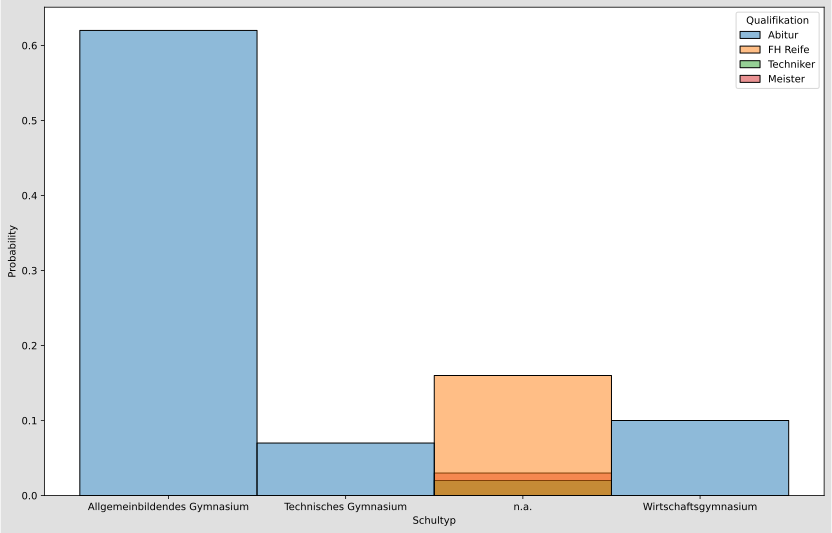

In [ ]:
plt.figure(figsize=(14,9))
sns.histplot(x='Schultyp', data=studium_df, discrete=True, stat='probability', hue="Qualifikation")

Anhand des Plots ist ersichtlich, dass bei Qualifikation außer Abitur der Schultyp unbekannt(n.a.) ist. Deshalb werden wir diese zwei Attribute als Knoten im Graph miteinander verbinden.

#### Schnitt und Bundesland

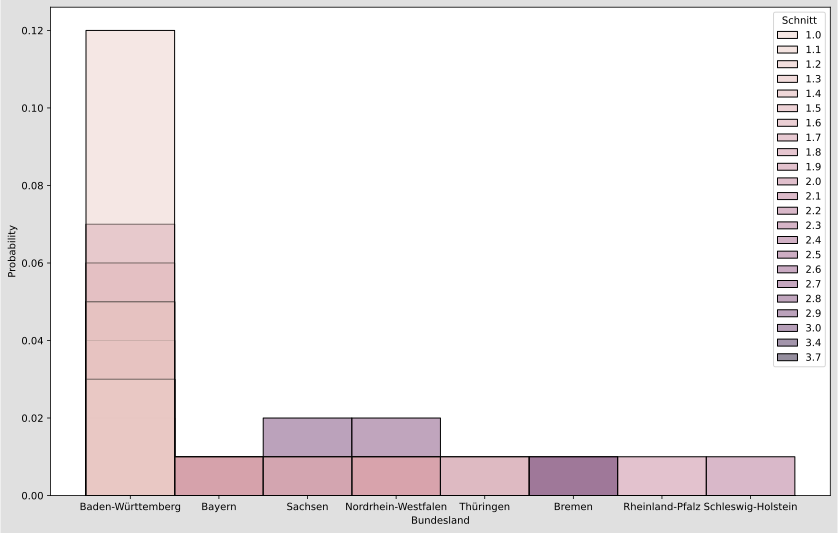

In [ ]:
plt.figure(figsize=(14,9))
sns.histplot(x='Bundesland', data=studium_df, discrete=True, stat='probability', hue="Schnitt")

Baden-Württemberg ist im Datensatz am meisten vertreten und die Schüler erzielen auch den besten Schnitt im Vergleich zu anderen Bundesländern.

#### Geschlecht und Studiengang

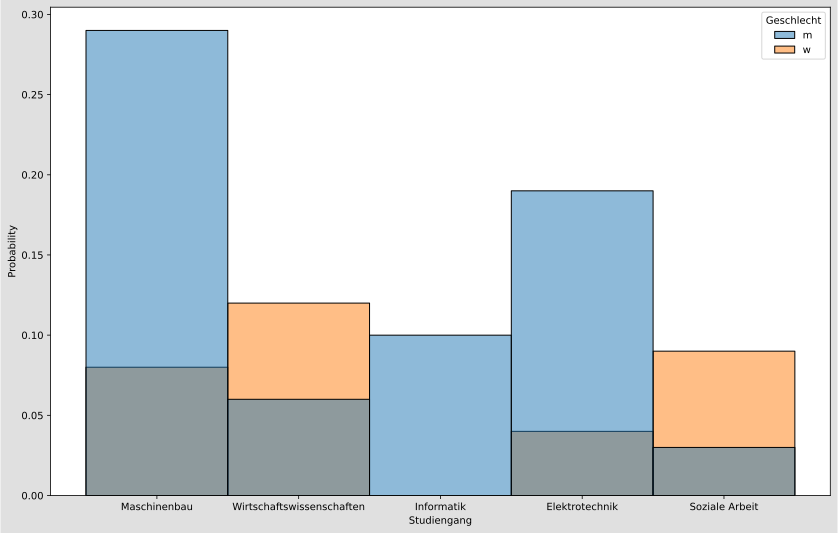

In [ ]:
plt.figure(figsize=(14,9))
sns.histplot(x='Studiengang', data=studium_df, discrete=True, stat='probability', hue="Geschlecht")

Frauen entscheiden sich eher für die Studiengänge Wirtschaftswissenschaften und Soziale Arbeit. Männer hingegen bevorzugen die technischen Studiengänge.

#### Abschluss-Verteilung

Der Abschluss-Median ist: 2.75


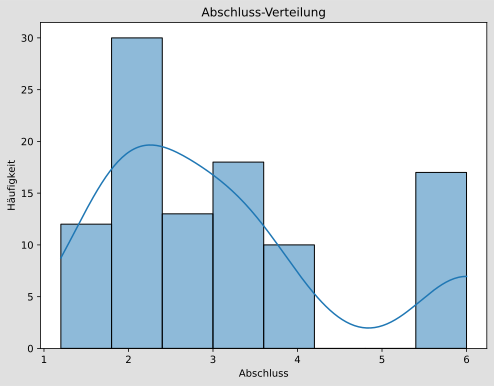

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.histplot(studium_df['Abschluss'],kde=True,ax=ax)
plt.title('Abschluss-Verteilung')
plt.xlabel('Abschluss')
plt.ylabel('Häufigkeit')
print('Der Abschluss-Median ist: ' + str(studium_df['Abschluss'].median()))

## Daten bereinigen

#### Schnitt und Fächer zu Klassen umwandeln

In [ ]:
def change_noten_to_classes(cell):
    cell = str(cell)
    if cell not in "keine" and cell not in "abgebrochen":
        cell = cell.replace(',', '.')
        cell = float(cell)
        if 1.0 <= cell <= 1.4:
            cell = "sehr_gut"
        elif 1.5 <= cell <= 2.4:
            cell = "gut"
        elif 2.5 <= cell <= 3.4:
            cell = "befriedigend"
        elif 3.5 <= cell <= 4.0:
            cell = "ausreichend"
        else:
            print("ERROR: Unknown value in cell")
    return cell

In [ ]:
studium_df_cleaned['Schnitt'] = studium_df_cleaned['Schnitt'].apply(lambda x: change_noten_to_classes(x))
studium_df_cleaned['Mathe'] = studium_df_cleaned['Mathe'].apply(lambda x: change_noten_to_classes(x))
studium_df_cleaned['Physik'] = studium_df_cleaned['Physik'].apply(lambda x: change_noten_to_classes(x))
studium_df_cleaned['Deutsch'] = studium_df_cleaned['Deutsch'].apply(lambda x: change_noten_to_classes(x))

#### Alter zu Klassen

In [ ]:
def change_alter_to_classes(cell):
    cell = int(cell)
    if cell < 19:
        cell = "<19"
    elif 19 <= cell <= 21:
        cell = "19-21"
    elif 22 <= cell <= 24:
        cell = "22-24"
    elif 25 <= cell < 27:
        cell = "25-27"
    elif 27 <= cell:
        cell = ">=27"
    else:
        print("ERROR: Unknown value in cell")
    return cell

In [ ]:
studium_df_cleaned['Alter'] = studium_df_cleaned['Alter'].apply(lambda x: change_alter_to_classes(x))

#### Schultyp: n.a. zu unbekannt umbenennen

In [ ]:
studium_df_cleaned['Schultyp'] = studium_df_cleaned['Schultyp'].str.replace('n.a.', 'unbekannt')

#### OLT-Fächer zu Klassen umwandeln

In [ ]:
def change_olt_to_classes(cell):
    cell = int(cell)
    if 0 <= cell < 20:
        cell = "0-19"
    elif 20 <= cell < 40:
        cell = "20-39"
    elif 40 <= cell < 60:
        cell = "40-59"
    elif 60 <= cell < 80:
        cell = "60-79"
    elif 80 <= cell < 100:
        cell = "80-99"
    else:
        print("ERROR: Unknown value in cell")
    return cell

In [ ]:
studium_df_cleaned['OLT-Mathe'] = studium_df_cleaned['OLT-Mathe'].apply(lambda x: change_olt_to_classes(x))
studium_df_cleaned['OLT-Deutsch'] = studium_df_cleaned['OLT-Deutsch'].apply(lambda x: change_olt_to_classes(x))

#### Abschluss zu Klassen umwandeln

In [ ]:
studium_df_cleaned['Abschluss'] = studium_df_cleaned['Abschluss'].apply(lambda x: change_noten_to_classes(x))

## Bayesisches Netz erstellen

In [ ]:
studium_df_cleaned

,Qualifikation,Schnitt,Bundesland,Mathe,Physik,Deutsch,Schultyp,OLT-Mathe,OLT-Deutsch,Studierfähigkeitstest,Alter,Geschlecht,Jahreseinkommen der Eltern,Staatsbürgerschaft,Studiengang,Abschluss
0,Abitur,gut,Baden-Württemberg,gut,befriedigend,gut,Allgemeinbildendes Gymnasium,40-59,40-59,709,19-21,m,49670,deutsch,Maschinenbau,befriedigend
1,Abitur,sehr_gut,Baden-Württemberg,gut,befriedigend,sehr_gut,Technisches Gymnasium,60-79,60-79,901,19-21,w,53870,deutsch,Wirtschaftswissenschaften,befriedigend
2,Abitur,gut,Baden-Württemberg,gut,gut,befriedigend,Allgemeinbildendes Gymnasium,60-79,40-59,n.a.,<19,w,107690,deutsch,Wirtschaftswissenschaften,gut
3,Abitur,gut,Bayern,gut,gut,befriedigend,Allgemeinbildendes Gymnasium,80-99,60-79,n.a.,<19,m,147830,deutsch,Maschinenbau,gut
4,FH Reife,sehr_gut,Sachsen,keine,keine,keine,unbekannt,40-59,60-79,746,22-24,m,54840,deutsch,Informatik,befriedigend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Abitur,sehr_gut,Baden-Württemberg,sehr_gut,sehr_gut,sehr_gut,Wirtschaftsgymnasium,80-99,60-79,n.a.,<19,w,130750,deutsch,Soziale Arbeit,sehr_gut
96,Abitur,sehr_gut,Baden-Württemberg,gut,befriedigend,gut,Technisches Gymnasium,60-79,60-79,n.a.,<19,m,130650,deutsch,Elektrotechnik,befriedigend
97,Abitur,sehr_gut,Bayern,gut,gut,sehr_gut,Wirtschaftsgymnasium,60-79,80-99,n.a.,<19,m,102800,deutsch,Elektrotechnik,gut
98,FH Reife,befriedigend,Baden-Württemberg,keine,keine,keine,unbekannt,0-19,0-19,744,<19,w,49050,Non European,Maschinenbau,abgebrochen


In [ ]:
# Wir arbeiten nur auf studium_df_test und lassen studium_df_cleaned unberührt
studium_df_test = studium_df_cleaned.copy()

Durch die Datenanalyse haben wir herausgefunden, dass die Felder "Jahreseinkommen der Eltern", "Staatsbürgerschaft" und "Studierfähigkeit" eines Studierenden für die Endprognose des Abschlusses eher irrelevant sind. Diese bauen wir demnach auch nicht in unser Bayes Netz ein.

In [ ]:
studium_df_test.drop(['Jahreseinkommen der Eltern', 'Staatsbürgerschaft', 'Studierfähigkeitstest'], axis=1, inplace=True)
studium_df_test

,Qualifikation,Schnitt,Bundesland,Mathe,Physik,Deutsch,Schultyp,OLT-Mathe,OLT-Deutsch,Alter,Geschlecht,Studiengang,Abschluss
0,Abitur,gut,Baden-Württemberg,gut,befriedigend,gut,Allgemeinbildendes Gymnasium,40-59,40-59,19-21,m,Maschinenbau,befriedigend
1,Abitur,sehr_gut,Baden-Württemberg,gut,befriedigend,sehr_gut,Technisches Gymnasium,60-79,60-79,19-21,w,Wirtschaftswissenschaften,befriedigend
2,Abitur,gut,Baden-Württemberg,gut,gut,befriedigend,Allgemeinbildendes Gymnasium,60-79,40-59,<19,w,Wirtschaftswissenschaften,gut
3,Abitur,gut,Bayern,gut,gut,befriedigend,Allgemeinbildendes Gymnasium,80-99,60-79,<19,m,Maschinenbau,gut
4,FH Reife,sehr_gut,Sachsen,keine,keine,keine,unbekannt,40-59,60-79,22-24,m,Informatik,befriedigend
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Abitur,sehr_gut,Baden-Württemberg,sehr_gut,sehr_gut,sehr_gut,Wirtschaftsgymnasium,80-99,60-79,<19,w,Soziale Arbeit,sehr_gut
96,Abitur,sehr_gut,Baden-Württemberg,gut,befriedigend,gut,Technisches Gymnasium,60-79,60-79,<19,m,Elektrotechnik,befriedigend
97,Abitur,sehr_gut,Bayern,gut,gut,sehr_gut,Wirtschaftsgymnasium,60-79,80-99,<19,m,Elektrotechnik,gut
98,FH Reife,befriedigend,Baden-Württemberg,keine,keine,keine,unbekannt,0-19,0-19,<19,w,Maschinenbau,abgebrochen


In [ ]:
# Bei Bedarf bitte diese Zeilen auskommentieren und nochmals ausführen
# ! pip install graphviz
# ! pip install pydotplus
# ! pip install pyAgrum

In [ ]:
import pyAgrum as bnet
import networkx as nx
import pandas as pd
import numpy as np
import pyAgrum.lib.notebook as gnb

### Nodes initialisieren

In diesem Abschnitt werden die einzelnen Knoten erstellt und mit den entsprechenden Klassen aus dem Dataframe befüllt.

In [ ]:
studies = bnet.BayesNet('studiesNet')
nodes = {}

In [ ]:
# Hier bestimmen wir die Liste aller Klassen
oltdeutsch_classes = pd.get_dummies(studium_df_test['OLT-Deutsch']).columns
oltmathe_classes = pd.get_dummies(studium_df_test['OLT-Mathe']).columns
mathe_classes = pd.get_dummies(studium_df_test['Mathe']).columns
deutsch_classes = pd.get_dummies(studium_df_test['Deutsch']).columns
physik_classes = pd.get_dummies(studium_df_test['Physik']).columns
alter_classes = pd.get_dummies(studium_df_test['Alter']).columns
quali_classes = pd.get_dummies(studium_df_test['Qualifikation']).columns
schnitt_classes = pd.get_dummies(studium_df_test['Schnitt']).columns
geschlecht_classes = pd.get_dummies(studium_df_test['Geschlecht']).columns
bundesland_classes = pd.get_dummies(studium_df_test['Bundesland']).columns
studiengang_classes = pd.get_dummies(studium_df_test['Studiengang']).columns
schultyp_classes = pd.get_dummies(studium_df_test['Schultyp']).columns
abschluss_classes = pd.get_dummies(studium_df_test['Abschluss']).columns

In [ ]:
nodes['OLT-Deutsch'] = studies.add(
    bnet.LabelizedVariable('OLT-Deutsch','OLT-Deutsch',0) \
        .addLabel(oltdeutsch_classes[0]) \
        .addLabel(oltdeutsch_classes[1]) \
        .addLabel(oltdeutsch_classes[2]) \
        .addLabel(oltdeutsch_classes[3]) \
        .addLabel(oltdeutsch_classes[4])
)

nodes['OLT-Mathe'] = studies.add(
    bnet.LabelizedVariable('OLT-Mathe','OLT-Mathe',0) \
        .addLabel(oltmathe_classes[0]) \
        .addLabel(oltmathe_classes[1]) \
        .addLabel(oltmathe_classes[2]) \
        .addLabel(oltmathe_classes[3]) \
        .addLabel(oltmathe_classes[4])
)

nodes['Deutsch'] = studies.add(
    bnet.LabelizedVariable('Deutsch','Deutsch',0) \
        .addLabel(deutsch_classes[0]) \
        .addLabel(deutsch_classes[1]) \
        .addLabel(deutsch_classes[2]) \
        .addLabel(deutsch_classes[3]) \
        .addLabel(deutsch_classes[4])
)

nodes['Mathe'] = studies.add(
    bnet.LabelizedVariable('Mathe','Mathe',0) \
        .addLabel(mathe_classes[0]) \
        .addLabel(mathe_classes[1]) \
        .addLabel(mathe_classes[2]) \
        .addLabel(mathe_classes[3]) \
        .addLabel(mathe_classes[4])
)

nodes['Physik'] = studies.add(
    bnet.LabelizedVariable('Physik','Physik',0) \
        .addLabel(physik_classes[0]) \
        .addLabel(physik_classes[1]) \
        .addLabel(physik_classes[2]) \
        .addLabel(physik_classes[3]) \
        .addLabel(physik_classes[4])
)

nodes['Qualifikation'] = studies.add(
    bnet.LabelizedVariable('Qualifikation','Qualifikation',0) \
        .addLabel(quali_classes[0]) \
        .addLabel(quali_classes[1]) \
        .addLabel(quali_classes[2]) \
        .addLabel(quali_classes[3])
)

nodes['Alter'] = studies.add(
    bnet.LabelizedVariable('Alter','Alter',0) \
        .addLabel(alter_classes[0]) \
        .addLabel(alter_classes[1]) \
        .addLabel(alter_classes[2]) \
        .addLabel(alter_classes[3]) \
        .addLabel(alter_classes[4])
)

nodes['Schultyp'] = studies.add(
    bnet.LabelizedVariable('Schultyp','Schultyp',0) \
        .addLabel(schultyp_classes[0]) \
        .addLabel(schultyp_classes[1]) \
        .addLabel(schultyp_classes[2]) \
        .addLabel(schultyp_classes[3])
)

nodes['Studiengang'] = studies.add(
    bnet.LabelizedVariable('Studiengang','Studiengang',0) \
        .addLabel(studiengang_classes[0]) \
        .addLabel(studiengang_classes[1]) \
        .addLabel(studiengang_classes[2]) \
        .addLabel(studiengang_classes[3]) \
        .addLabel(studiengang_classes[4])
)

nodes['Schnitt'] = studies.add(
    bnet.LabelizedVariable('Schnitt','Schnitt',0) \
        .addLabel(schnitt_classes[0]) \
        .addLabel(schnitt_classes[1]) \
        .addLabel(schnitt_classes[2]) \
        .addLabel(schnitt_classes[3])
)

nodes['Bundesland'] = studies.add(
    bnet.LabelizedVariable('Bundesland','Bundesland',0) \
        .addLabel(bundesland_classes[0]) \
        .addLabel(bundesland_classes[1]) \
        .addLabel(bundesland_classes[2]) \
        .addLabel(bundesland_classes[3]) \
        .addLabel(bundesland_classes[4]) \
        .addLabel(bundesland_classes[5]) \
        .addLabel(bundesland_classes[6]) \
        .addLabel(bundesland_classes[7])
)

nodes['Geschlecht'] = studies.add(
    bnet.LabelizedVariable('Geschlecht','Geschlecht',0) \
        .addLabel(geschlecht_classes[0]) \
        .addLabel(geschlecht_classes[1])
)

nodes['Abschluss'] = studies.add(
    bnet.LabelizedVariable('Abschluss','Abschluss',0) \
        .addLabel(abschluss_classes[0]) \
        .addLabel(abschluss_classes[1]) \
        .addLabel(abschluss_classes[2]) \
        .addLabel(abschluss_classes[3]) \
        .addLabel(abschluss_classes[4])
)

### Kanten erstellen

Hier werden die einzelnen Knoten miteinander verbunden auf Basis dessen, was wir in der Datenanalyse herausgefunden haben (welche Beziehungen haben die Merkmale zueinander?).

In [ ]:
studies.addArc(nodes['OLT-Deutsch'],nodes['Deutsch'])
studies.addArc(nodes['OLT-Mathe'],nodes['Mathe'])
studies.addArc(nodes['Deutsch'],nodes['Qualifikation'])
studies.addArc(nodes['Mathe'],nodes['Qualifikation'])
studies.addArc(nodes['Physik'],nodes['Qualifikation'])
studies.addArc(nodes['Qualifikation'],nodes['Schultyp'])
studies.addArc(nodes['Bundesland'],nodes['Schnitt'])
studies.addArc(nodes['Geschlecht'],nodes['Studiengang'])
studies.addArc(nodes['Studiengang'],nodes['Abschluss'])
studies.addArc(nodes['Schultyp'],nodes['Abschluss'])
studies.addArc(nodes['Schnitt'],nodes['Abschluss'])
studies.addArc(nodes['Alter'],nodes['Abschluss'])

### Graphen anzeigen lassen

Das Bayes Netz sieht nun folgendermaßen aus:

In [ ]:
studies

(pyAgrum.BayesNet<double>@0x55ba020c7600) BN{nodes: 13, arcs: 12, domainSize: 10^8.60206, dim: 2638}

## Wahrscheinlichkeiten berechnen

Für jeden einzelnen Knoten muss nun die Wahrscheinlichkeit auf Basis der Häufigkeit berechnet werden. Die Knoten, die unabhängig von anderen Knoten sind (keine Parent-Verbindung), brauchen lediglich die absolute Häufigkeit als Wahrscheinlichkeitswert. Knoten, die abhängig von anderen sind, brauchen Werte aus Kombinationen von einzelnen Parent-Werten.

#### CPTs für Merkmale, die unabhängig sind

##### OLT-Mathe

In [ ]:
oltmathe_freqs = []
for i in range(0, len(oltmathe_classes)):
    freq = studium_df_test['OLT-Mathe'].value_counts(normalize=True)[oltmathe_classes[i]]
    oltmathe_freqs.append(freq)
studies.cpt(nodes['OLT-Mathe']).fillWith(oltmathe_freqs)

(pyAgrum.Potential<double>@0x55ba06a0d9c0) 
  OLT-Mathe                                      |
0-19     |20-39    |40-59    |60-79    |80-99    |
---------|---------|---------|---------|---------|
 0.0300  | 0.1800  | 0.2900  | 0.3200  | 0.1800  |

##### OLT-Deutsch

In [ ]:
oltdeutsch_freqs = []
for i in range(0, len(oltdeutsch_classes)):
    freq = studium_df_test['OLT-Deutsch'].value_counts(normalize=True)[oltdeutsch_classes[i]]
    oltdeutsch_freqs.append(freq)
studies.cpt(nodes['OLT-Deutsch']).fillWith(oltdeutsch_freqs)

(pyAgrum.Potential<double>@0x55ba063369a0) 
  OLT-Deutsch                                    |
0-19     |20-39    |40-59    |60-79    |80-99    |
---------|---------|---------|---------|---------|
 0.0200  | 0.1000  | 0.5700  | 0.2800  | 0.0300  |

##### Physik

In [ ]:
physik_freqs = []
for i in range(0, len(physik_classes)):
    freq = studium_df_test['Physik'].value_counts(normalize=True)[physik_classes[i]]
    physik_freqs.append(freq)
studies.cpt(nodes['Physik']).fillWith(physik_freqs)

(pyAgrum.Potential<double>@0x55ba05f333a0) 
  Physik                                         |
ausreiche|befriedig|gut      |keine    |sehr_gut |
---------|---------|---------|---------|---------|
 0.0400  | 0.2000  | 0.3600  | 0.2800  | 0.1200  |

##### Alter

In [ ]:
alter_freqs = []
for i in range(0, len(alter_classes)):
    freq = studium_df_test['Alter'].value_counts(normalize=True)[alter_classes[i]]
    alter_freqs.append(freq)
studies.cpt(nodes['Alter']).fillWith(alter_freqs)

(pyAgrum.Potential<double>@0x55ba0236b240) 
  Alter                                          |
19-21    |22-24    |25-27    |<19      |>=27     |
---------|---------|---------|---------|---------|
 0.4300  | 0.0600  | 0.0400  | 0.4600  | 0.0100  |

##### Geschlecht

In [ ]:
gender_freqs = []
for i in range(0, len(geschlecht_classes)):
    freq = studium_df_test['Geschlecht'].value_counts(normalize=True)[geschlecht_classes[i]]
    gender_freqs.append(freq)
studies.cpt(nodes['Geschlecht']).fillWith(gender_freqs)

(pyAgrum.Potential<double>@0x55ba063ea1e0) 
  Geschlecht       |
m        |w        |
---------|---------|
 0.6700  | 0.3300  |

##### Bundesland

In [ ]:
bundesland_freqs = []
for i in range(0, len(bundesland_classes)):
    freq = studium_df_test['Bundesland'].value_counts(normalize=True)[bundesland_classes[i]]
    bundesland_freqs.append(freq)
studies.cpt(nodes['Bundesland']).fillWith(bundesland_freqs)

(pyAgrum.Potential<double>@0x55ba01d5bee0) 
  Bundesland                                                                   |
Baden-Wü|Bayern   |Bremen   |Nordrhein|Rheinland|Sachsen  |Schleswig|Thüringe|
---------|---------|---------|---------|---------|---------|---------|---------|
 0.7400  | 0.0600  | 0.0200  | 0.0800  | 0.0100  | 0.0600  | 0.0100  | 0.0200  |

#### CPTs für Merkmale mit einer Abhängigkeit

Funktion definieren, um die Häufigkeiten einzelner Child-Knoten in Abhängigkeit ihres Parents (1) zu definieren

In [ ]:
def set_freqs_for_nodes_with_1_parent(data, child, parent, child_classes, parent_classes):
    for i in range(0, len(parent_classes)):
        p_cond_df = (data[parent] == parent_classes[i])
        p_cond_df_len = len(data.loc[p_cond_df].index)
        freqs = []
        for j in range(0, len(child_classes)):
            c_cond_df = (data[child] == child_classes[j])
            df = data.loc[(p_cond_df & c_cond_df)]
            freq = len(df)/p_cond_df_len
            freqs.append(freq)
        print(freqs)
        studies.cpt(child)[{parent: parent_classes[i]}] = freqs

##### Mathe

In [ ]:
set_freqs_for_nodes_with_1_parent(studium_df_test, 'Mathe', 'OLT-Mathe', mathe_classes, oltmathe_classes)

[0.0, 0.0, 0.0, 1.0, 0.0]
[0.05555555555555555, 0.3333333333333333, 0.0, 0.6111111111111112, 0.0]
[0.0, 0.20689655172413793, 0.5517241379310345, 0.2413793103448276, 0.0]
[0.0, 0.0, 0.65625, 0.0, 0.34375]
[0.0, 0.0, 0.2222222222222222, 0.0, 0.7777777777777778]


In [ ]:
studies.cpt(nodes['Mathe'])

(pyAgrum.Potential<double>@0x55ba05f33420) 
      ||  Mathe                                          |
OLT-Ma||ausreiche|befriedig|gut      |keine    |sehr_gut |
------||---------|---------|---------|---------|---------|
0-19  || 0.0000  | 0.0000  | 0.0000  | 1.0000  | 0.0000  |
20-39 || 0.0556  | 0.3333  | 0.0000  | 0.6111  | 0.0000  |
40-59 || 0.0000  | 0.2069  | 0.5517  | 0.2414  | 0.0000  |
60-79 || 0.0000  | 0.0000  | 0.6562  | 0.0000  | 0.3438  |
80-99 || 0.0000  | 0.0000  | 0.2222  | 0.0000  | 0.7778  |

In [ ]:
# zum Überprüfen, ob berechnete Wahrscheinlichkeiten korrekt sind
pd.crosstab(studium_df_test['OLT-Mathe'],studium_df_test['Mathe'], margins=False, normalize='index')

Mathe,ausreichend,befriedigend,gut,keine,sehr_gut
OLT-Mathe,,,,,
0-19,0.000000,0.000000,0.000000,1.000000,0.000000
20-39,0.055556,0.333333,0.000000,0.611111,0.000000
40-59,0.000000,0.206897,0.551724,0.241379,0.000000
60-79,0.000000,0.000000,0.656250,0.000000,0.343750
80-99,0.000000,0.000000,0.222222,0.000000,0.777778


##### Deutsch

In [ ]:
set_freqs_for_nodes_with_1_parent(studium_df_test, 'Deutsch', 'OLT-Deutsch', deutsch_classes, oltdeutsch_classes)

[0.0, 0.0, 0.0, 1.0, 0.0]
[0.1, 0.1, 0.0, 0.8, 0.0]
[0.0, 0.3508771929824561, 0.47368421052631576, 0.15789473684210525, 0.017543859649122806]
[0.0, 0.07142857142857142, 0.42857142857142855, 0.07142857142857142, 0.42857142857142855]
[0.0, 0.0, 0.0, 0.0, 1.0]


In [ ]:
studies.cpt(nodes['Deutsch'])

(pyAgrum.Potential<double>@0x55ba05f325e0) 
      ||  Deutsch                                        |
OLT-De||ausreiche|befriedig|gut      |keine    |sehr_gut |
------||---------|---------|---------|---------|---------|
0-19  || 0.0000  | 0.0000  | 0.0000  | 1.0000  | 0.0000  |
20-39 || 0.1000  | 0.1000  | 0.0000  | 0.8000  | 0.0000  |
40-59 || 0.0000  | 0.3509  | 0.4737  | 0.1579  | 0.0175  |
60-79 || 0.0000  | 0.0714  | 0.4286  | 0.0714  | 0.4286  |
80-99 || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 1.0000  |

In [ ]:
# zum Überprüfen, ob Wahrscheinlichkeiten korrekt sind
pd.crosstab(studium_df_test['OLT-Deutsch'],studium_df_test['Deutsch'], margins=False, normalize='index')

Deutsch,ausreichend,befriedigend,gut,keine,sehr_gut
OLT-Deutsch,,,,,
0-19,0.0,0.000000,0.000000,1.000000,0.000000
20-39,0.1,0.100000,0.000000,0.800000,0.000000
40-59,0.0,0.350877,0.473684,0.157895,0.017544
60-79,0.0,0.071429,0.428571,0.071429,0.428571
80-99,0.0,0.000000,0.000000,0.000000,1.000000


##### Studiengang

In [ ]:
set_freqs_for_nodes_with_1_parent(studium_df_test, 'Studiengang', 'Geschlecht', studiengang_classes, geschlecht_classes)

[0.2835820895522388, 0.14925373134328357, 0.43283582089552236, 0.04477611940298507, 0.08955223880597014]
[0.12121212121212122, 0.0, 0.24242424242424243, 0.2727272727272727, 0.36363636363636365]


In [ ]:
studies.cpt(nodes['Studiengang'])

(pyAgrum.Potential<double>@0x55ba02ad5180) 
      ||  Studiengang                                    |
Geschl||Elektrote|Informati|Maschinen|Soziale A|Wirtschaf|
------||---------|---------|---------|---------|---------|
m     || 0.2836  | 0.1493  | 0.4328  | 0.0448  | 0.0896  |
w     || 0.1212  | 0.0000  | 0.2424  | 0.2727  | 0.3636  |

##### Schnitt

In [ ]:
set_freqs_for_nodes_with_1_parent(studium_df_test, 'Schnitt', 'Bundesland', schnitt_classes, bundesland_classes)

[0.0, 0.14864864864864866, 0.4594594594594595, 0.3918918918918919]
[0.16666666666666666, 0.16666666666666666, 0.5, 0.16666666666666666]
[0.0, 1.0, 0.0, 0.0]
[0.0, 0.25, 0.625, 0.125]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.5, 0.3333333333333333, 0.16666666666666666]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.5, 0.5]


In [ ]:
studies.cpt(nodes['Schnitt'])

(pyAgrum.Potential<double>@0x55ba02ad51c0) 
      ||  Schnitt                              |
Bundes||ausreiche|befriedig|gut      |sehr_gut |
------||---------|---------|---------|---------|
Baden-|| 0.0000  | 0.1486  | 0.4595  | 0.3919  |
Bayern|| 0.1667  | 0.1667  | 0.5000  | 0.1667  |
Bremen|| 0.0000  | 1.0000  | 0.0000  | 0.0000  |
Nordrh|| 0.0000  | 0.2500  | 0.6250  | 0.1250  |
Rheinl|| 0.0000  | 0.0000  | 1.0000  | 0.0000  |
Sachse|| 0.0000  | 0.5000  | 0.3333  | 0.1667  |
Schles|| 0.0000  | 0.0000  | 1.0000  | 0.0000  |
Thüri|| 0.0000  | 0.0000  | 0.5000  | 0.5000  |

##### Schultyp

In [ ]:
set_freqs_for_nodes_with_1_parent(studium_df_test, 'Schultyp', 'Qualifikation', schultyp_classes, quali_classes)

[0.7848101265822784, 0.08860759493670886, 0.12658227848101267, 0.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]


In [ ]:
studies.cpt(nodes['Schultyp'])

(pyAgrum.Potential<double>@0x55ba05f339a0) 
      ||  Schultyp                             |
Qualif||Allgemein|Technisch|Wirtschaf|unbekannt|
------||---------|---------|---------|---------|
Abitur|| 0.7848  | 0.0886  | 0.1266  | 0.0000  |
FH Rei|| 0.0000  | 0.0000  | 0.0000  | 1.0000  |
Meiste|| 0.0000  | 0.0000  | 0.0000  | 1.0000  |
Techni|| 0.0000  | 0.0000  | 0.0000  | 1.0000  |

#### CPTs für Merkmale mit 3 Abhängigkeiten

Funktion definieren, um die Häufigkeiten einzelner Child-Knoten in Abhängigkeit von 3 Parents zu setzen

In [ ]:
def set_freqs_for_nodes_with_3_parents(data, child, parent1, parent2, parent3, child_classes, parent1_classes, parent2_classes, parent3_classes):
    for i in range(0, len(parent1_classes)):
        p1_cond_df = (data[parent1] == parent1_classes[i])
        for j in range(0, len(parent2_classes)):
            p2_cond_df = (data[parent2] == parent2_classes[j])
            for k in range(0, len(parent3_classes)):
                p3_cond_df = (data[parent3] == parent3_classes[k])
                parents_cond_df = (p1_cond_df & p2_cond_df & p3_cond_df)
                parents_cond_df_len = len(data.loc[parents_cond_df].index)
                freqs = []
                if parents_cond_df_len > 0:
                    for l in range(0, len(child_classes)):
                        c_cond_df = (data[child] == child_classes[l])
                        df = data.loc[(parents_cond_df & c_cond_df)]
                        freq = len(df)/parents_cond_df_len
                        freqs.append(freq)
                else:
                    # Falls eine Kombination aus Parent-Werten nicht im DF vorhanden ist, so befüllen wir die Tabelle mit 0-Werten
                    for l in range(0, len(child_classes)):
                        freqs.append(0.0)
                print(freqs)
                studies.cpt(child)[{parent1: parent1_classes[i], parent2: parent2_classes[j], parent3: parent3_classes[k]}] = freqs

##### Qualifikation

In [ ]:
# Qualifikation
set_freqs_for_nodes_with_3_parents(
    studium_df_test,
    'Qualifikation',
    'Mathe',
    'Deutsch',
    'Physik',
    quali_classes,
    mathe_classes,
    deutsch_classes,
    physik_classes
)

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.

In [ ]:
studies.cpt(nodes['Qualifikation'])

(pyAgrum.Potential<double>@0x55ba06877100) 
                    ||  Qualifikation                        |
Deutsc|Mathe |Physik||Abitur   |FH Reife |Meister  |Techniker|
------|------|------||---------|---------|---------|---------|
ausrei|ausrei|ausrei|| 0.0000  | 0.0000  | 0.0000  | 0.0000  |
befrie|ausrei|ausrei|| 0.0000  | 0.0000  | 0.0000  | 0.0000  |
gut   |ausrei|ausrei|| 0.0000  | 0.0000  | 0.0000  | 0.0000  |
keine |ausrei|ausrei|| 0.0000  | 0.0000  | 0.0000  | 0.0000  |
sehr_g|ausrei|ausrei|| 0.0000  | 0.0000  | 0.0000  | 0.0000  |
ausrei|befrie|ausrei|| 0.0000  | 0.0000  | 0.0000  | 0.0000  |
[...113 more line(s) ...]
sehr_g|keine |sehr_g|| 0.0000  | 0.0000  | 0.0000  | 0.0000  |
ausrei|sehr_g|sehr_g|| 0.0000  | 0.0000  | 0.0000  | 0.0000  |
befrie|sehr_g|sehr_g|| 1.0000  | 0.0000  | 0.0000  | 0.0000  |
gut   |sehr_g|sehr_g|| 1.0000  | 0.0000  | 0.0000  | 0.0000  |
keine |sehr_g|sehr_g|| 0.0000  | 0.0000  | 0.0000  | 0.0000  |
sehr_g|sehr_g|sehr_g|| 1.0000  | 0.0000  | 0.0000  | 0.0000  |

In [ ]:
# zum Überprüfen, ob Wahrscheinlichkeiten korrekt sind
pd.crosstab(studium_df_test['Qualifikation'],studium_df_test['Schultyp'], margins=False, normalize='index')

Schultyp,Allgemeinbildendes Gymnasium,Technisches Gymnasium,Wirtschaftsgymnasium,unbekannt
Qualifikation,,,,
Abitur,0.78481,0.088608,0.126582,0.0
FH Reife,0.00000,0.000000,0.000000,1.0
Meister,0.00000,0.000000,0.000000,1.0
Techniker,0.00000,0.000000,0.000000,1.0


### CPTs für Merkmale mit 4 Abhängigkeiten

Funktion definieren, um die Häufigkeiten einzelner Child-Knoten in Abhängigkeit ihrer Parents (4) zu definieren

In [ ]:
def set_freqs_for_nodes_with_4_parents(data, child, parent1, parent2, parent3, parent4, child_classes, parent1_classes, parent2_classes, parent3_classes, parent4_classes):
    for i in range(0, len(parent1_classes)):
        p1_cond_df = (data[parent1] == parent1_classes[i])
        for j in range(0, len(parent2_classes)):
            p2_cond_df = (data[parent2] == parent2_classes[j])
            for k in range(0, len(parent3_classes)):
                p3_cond_df = (data[parent3] == parent3_classes[k])
                for l in range(0, len(parent4_classes)):
                    p4_cond_df = (data[parent4] == parent4_classes[l])
                    parents_cond_df = (p1_cond_df & p2_cond_df & p3_cond_df & p4_cond_df)
                    parents_cond_df_len = len(data.loc[parents_cond_df].index)
                    freqs = []
                    if parents_cond_df_len > 0:
                      for m in range(0, len(child_classes)):
                        c_cond_df = (data[child] == child_classes[m])
                        df = data.loc[(parents_cond_df & c_cond_df)]
                        freq = len(df)/parents_cond_df_len
                        freqs.append(freq)
                    else:
                      # Falls eine Kombination aus Parent-Werten nicht im DF vorhanden ist, so befüllen wir die Tabelle mit 0-Werten
                      for m in range(0, len(child_classes)):
                        freqs.append(0.0)
                    print(freqs)
                    studies.cpt(child).translate(1e-4).normalizeAsCPT()[{parent1: parent1_classes[i], parent2: parent2_classes[j], parent3: parent3_classes[k], parent4: parent4_classes[l]}] = freqs

##### Abschluss

In [ ]:
set_freqs_for_nodes_with_4_parents(studium_df_test, 'Abschluss', 'Schultyp', 'Studiengang', 'Alter', 'Schnitt', abschluss_classes, schultyp_classes, studiengang_classes, alter_classes, schnitt_classes)

[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.3333333333333333, 0.0, 0.6666666666666666, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.5, 0.5, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.5, 0.5, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 0.0]
[0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 0.0]


In [ ]:
studies.cpt(nodes['Abschluss'])

(pyAgrum.Potential<double>@0x55ba063cef80) 
                           ||  Abschluss                                      |
Studie|Schult|Schnit|Alter ||abgebroch|ausreiche|befriedig|gut      |sehr_gut |
------|------|------|------||---------|---------|---------|---------|---------|
Elektr|Allgem|ausrei|19-21 || 0.2000  | 0.2000  | 0.2000  | 0.2000  | 0.2000  |
Inform|Allgem|ausrei|19-21 || 0.2000  | 0.2000  | 0.2000  | 0.2000  | 0.2000  |
Maschi|Allgem|ausrei|19-21 || 0.2000  | 0.2000  | 0.2000  | 0.2000  | 0.2000  |
Sozial|Allgem|ausrei|19-21 || 0.2000  | 0.2000  | 0.2000  | 0.2000  | 0.2000  |
Wirtsc|Allgem|ausrei|19-21 || 0.2000  | 0.2000  | 0.2000  | 0.2000  | 0.2000  |
Elektr|Techni|ausrei|19-21 || 0.2000  | 0.2000  | 0.2000  | 0.2000  | 0.2000  |
[...388 more line(s) ...]
Wirtsc|Wirtsc|sehr_g|>=27  || 0.2000  | 0.2000  | 0.2000  | 0.2000  | 0.2000  |
Elektr|unbeka|sehr_g|>=27  || 0.2000  | 0.2000  | 0.2000  | 0.2000  | 0.2000  |
Inform|unbeka|sehr_g|>=27  || 0.2000  | 0.2000  | 0.2000  | 0.2000  | 0.2000  |
Maschi|unbeka|sehr_g|>=27  || 0.2000  | 0.2000  | 0.2000  | 0.2000  | 0.2000  |
Sozial|unbeka|sehr_g|>=27  || 0.2000  | 0.2000  | 0.2000  | 0.2000  | 0.2000  |
Wirtsc|unbeka|sehr_g|>=27  || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |

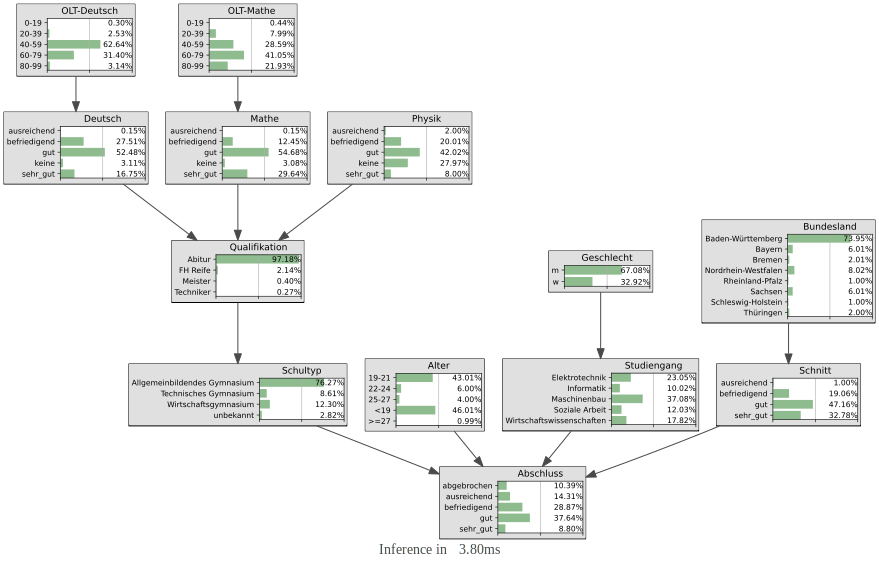

In [ ]:
gnb.showInference(studies,size="20")

## Inferenz und Vorhersage

Mit den gesetzten Wahrscheinlichkeiten für jeden Knoten kann das Bayes Netz nun Vorhersagen auf Basis von definierten Evidenzen tätigen. Wir verwenden hierbei LazyPropagation. Das ist eine Inferenzmethode, die das Bayes Netz in einen Hypergraphen umwandelt, der als Join-Tree oder Junction-Tree bezeichnet wird. Dieser Baum wird konstruiert, um Inferenzberechnungen zu optimieren.

In [ ]:
studies_inference = bnet.LazyPropagation(studies)

### Inferenz mit Evidenz-Beispiel anzeigen

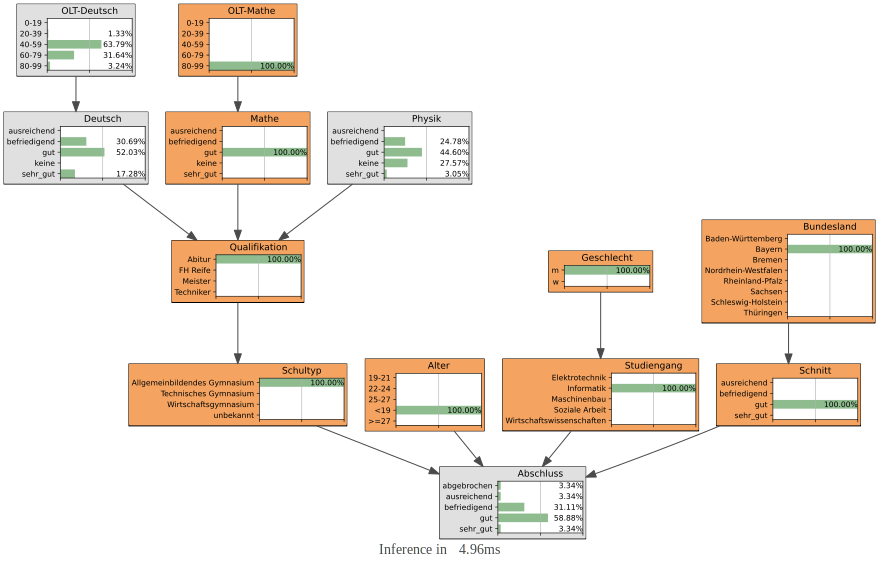

In [ ]:
gnb.showInference(studies,evs={
    'Qualifikation': 'Abitur',
    'OLT-Mathe':'80-99',
    'Mathe': 'gut',
    'Schultyp':'Allgemeinbildendes Gymnasium',
    'Geschlecht':'m',
    'Bundesland':'Bayern',
    'Studiengang':'Informatik',
    'Schnitt':'gut',
    'Alter':'<19'
    }, size="20")

### Ergebnis-Bewertung

Durch die obige Angabe von Evidenzen

('Qualifikation': 'Abitur',
'OLT-Mathe':'80-99',
'Mathe': 'gut',
'Schultyp':'Allgemeinbildendes Gymnasium',
'Geschlecht':'m',
'Bundesland':'Bayern',
'Studiengang':'Informatik',
'Schnitt':'gut',
'Alter':'<19')

ist zu erwarten, dass der Schüler im Studiengang Informatik einen guten Abschluss ablegen wird. Wir gehen davon aus, dass der Schüler durch seine gute Note in Mathe, seinem guten Schnitt, des Abiturs und jungen Alters eine gute Leistung auch im Studium zeigen wird.

Das Ergebnis der Inferenz ist der obigen Grafik zu entnehmen. Wie erwartet, wird der Schüler mit den Beispielevidenzen im Studiengang Informatik wahrscheinlich zu 58.88% einen guten Abschluss erzielen.

Unser Vorhersagemodell sagt die Erfolgschancen der Schüler gut voraus. Allerdings könnte der Datenbestand größer und umfangreicher sein, so dass die Genauigkeit der Vorhersagewahrscheinlichkeiten höher ist.
Beispielsweise gibt es nur Angaben zu den Noten in Mathe, Physik und Deutsch, wenn die Qualifikation Abitur ist. Genauso existiert eine Angabe zum Schultyp nur bei der Qualifikation Abitur. Dies kann die Vorhersage ungenau beeinflussen.



Aus dem Vorhersagemodell ist zusammenfassend erkennbar, dass Schüler, die eine andere Qualifikation als Abitur haben, mit sehr hoher Wahrscheinlichkeit das Studium abbrechen werden. Somit gilt das Abitur als eine sehr gute Grundlage, das Studium zu bestehen. Auch das Alter spielt eine Rolle. Schüler unter 19 erreichen mit höherer Wahrscheinlichkeit einen besseren Abschluss. Ab dem 23. Lebensjahr sinkt die Wahrscheinlichkeit, das Studium bis zum Ende durchzuziehen bzw. zu bestehen.
Die besten Abschlüsse erzielen mit hoher Wahrscheinlichkeit weibliche Studenten, die auf einem Wirtschaftsgymnasium waren und Soziale Arbeit studieren.

In [ ]:
import pyAgrum as gum
import os
gum.saveBN(studies,os.path.join("./","studies.bif"))

## Evidenz-Test

Dieser Abschnitt dient dazu, eine eigene CSV-Datei mit anderen Daten einzulesen. Durch eine Pipeline wird die CSV-Datei wie im obigen Schritt bereinigt und dann dem Netz zugeführt, wo es für jeden vorkommenden Studierenden in der CSV eine Prognose bezüglich des Abschlusses tätigen kann.

### Test-Datei einlesen

In [ ]:
### HIER CSV DATEI ERSETZEN ###
test_df = pd.read_csv("DP13_test.csv", sep=";")
test_df

,Qualifikation,Schnitt,Bundesland,Mathe,Physik,Deutsch,Schultyp,OLT-Mathe,OLT-Deutsch,Studierfähigkeitstest,Alter,Geschlecht,Jahreseinkommen der Eltern,Staatsbürgerschaft,Studiengang
0,Abitur,2,Hessen,"1,7","3,2","2,2",Allgemeinbildendes Gymnasium,73,77,749,17,m,76670,deutsch,Informatik
1,Abitur,"1,3",Baden-Württemberg,"2,3","3,1",1,Technisches Gymnasium,71,77,901,19,w,53870,deutsch,Wirtschaftswissenschaften
2,Hauptschule,1,Hessen,"3,6",keine,4,Hauptschule,19,36,n.a.,17,m,38540,EU Bürger,Informatik
3,Abitur,"1,7",Bayern,"1,5","1,6","2,7",Allgemeinbildendes Gymnasium,83,62,n.a.,17,m,147830,deutsch,Maschinenbau
4,FH Reife,"1,1",Sachsen,keine,keine,keine,n.a.,42,60,746,22,m,54840,deutsch,Informatik
5,Abitur,"3,2",Bayern,"2,5","3,4","2,5",Allgemeinbildendes Gymnasium,39,58,n.a.,24,w,66100,deutsch,Elektrotechnik
6,Techniker,1,Baden-Württemberg,keine,keine,keine,n.a.,43,56,705,22,m,102700,deutsch,Maschinenbau
7,Meister,"1,4",Rheinland-Pfalz,"1,6",keine,3,Gesamtschule,26,44,n.a.,18,m,55550,deutsch,Informatik
8,FH Reife,"2,2",Baden-Württemberg,keine,keine,keine,n.a.,29,33,978,23,w,85910,deutsch,Soziale Arbeit
9,Abitur,"1,9",Baden-Württemberg,"2,8","3,2","2,1",Allgemeinbildendes Gymnasium,80,90,990,21,m,49990,deutsch,Wirtschaftswissenschaften


In [ ]:
for column in test_df.columns:
  print(column + str(test_df[column].sort_values().unique()) + '\n')

Qualifikation['Abitur' 'FH Reife' 'Hauptschule' 'Meister' 'Techniker']

Schnitt['1' '1,1' '1,3' '1,4' '1,7' '1,9' '2' '2,2' '3,2']

Bundesland['Baden-Württemberg' 'Bayern' 'Hessen' 'Rheinland-Pfalz' 'Sachsen']

Mathe['1,5' '1,6' '1,7' '2,3' '2,5' '2,8' '3,6' 'keine']

Physik['1,6' '3,1' '3,2' '3,4' 'keine']

Deutsch['1' '2,1' '2,2' '2,5' '2,7' '3' '4' 'keine']

Schultyp['Allgemeinbildendes Gymnasium' 'Gesamtschule' 'Hauptschule'
 'Technisches Gymnasium' 'n.a.']

OLT-Mathe[19 26 29 39 42 43 71 73 80 83]

OLT-Deutsch[33 36 44 56 58 60 62 77 90]

Studierfähigkeitstest['705' '746' '749' '901' '978' '990' 'n.a.']

Alter[17 18 19 21 22 23 24]

Geschlecht['m' 'w']

Jahreseinkommen der Eltern[ 38540  49990  53870  54840  55550  66100  76670  85910 102700 147830]

Staatsbürgerschaft['EU Bürger' 'deutsch']

Studiengang['Elektrotechnik' 'Informatik' 'Maschinenbau' 'Soziale Arbeit'
 'Wirtschaftswissenschaften']



### Pipeline bauen

In [ ]:
def data_cleaning_pipeline(df):
  for i in ['Jahreseinkommen der Eltern', 'Staatsbürgerschaft', 'Studierfähigkeitstest']:
      try:
        df.drop(i, axis=1, inplace=True)
      except:
        pass
  faecher_cols = ['Mathe', 'Deutsch', 'Physik']
  for e in faecher_cols:
    try:
      df[e] = df[e].apply(lambda x: change_noten_to_classes(x))
    except:
      df[e] = "keine"

  try:
    df['Schnitt'] = df['Schnitt'].apply(lambda x: change_noten_to_classes(x))
  except:
    df['Schnitt'] = ""

  try:
    df['Alter'] = df['Alter'].apply(lambda x: change_alter_to_classes(x))
  except:
    df['Alter'] = ""

  try:
    schultyp = studium_df_test['Schultyp'].sort_values().unique()
    df['Schultyp'] = df['Schultyp'].str.replace('n.a.', 'unbekannt')
    for i in range (0, len(df.index)):
      if df['Schultyp'].loc[i] not in schultyp:
        df['Schultyp'].loc[i] = ""
  except:
    df['Schultyp'] = "unbekannt"

  try:
    bundeslaender = studium_df_test['Bundesland'].sort_values().unique()
    for i in range (0, len(df.index)):
      if df['Bundesland'].loc[i] not in bundeslaender:
        df['Bundesland'].loc[i] = ''
  except:
    df['Bundesland'] = ""

  try:
    qualifikation = studium_df_test['Qualifikation'].sort_values().unique()
    for i in range (0, len(df.index)):
      if df['Qualifikation'].loc[i] not in qualifikation:
        df['Qualifikation'].loc[i] = ""
  except:
    df['Qualifikation'] = ""

  try:
    staatsbuerger = studium_df_test['Staatsbürgerschaft'].sort_values().unique()
    for i in range (0, len(df.index)):
      if df['Staatsbürgerschaft'].loc[i] not in staatsbuerger:
        df['Staatsbürgerschaft'].loc[i] = ''
  except:
    df['Staatsbürgerschaft'] = ""

  try:
    studiengang = studium_df_test['Studiengang'].sort_values().unique()
    for i in range (0, len(df.index)):
      if df['Studiengang'].loc[i] not in studiengang:
        df['Studiengang'].loc[i] = ''
  except:
    df['Studiengang'] = ""


  olt_cols = ['OLT-Mathe', 'OLT-Deutsch']
  for e in olt_cols:
    try:
      df[e] = df[e].apply(lambda x: change_olt_to_classes(x))
    except:
      df[e] = ""

  return df

In [ ]:
def create_json_list_of_df(df):
  json_list = []
  for i in range (0, len(df.index)):
    json_obj = {}
    cols = studium_df_test.columns.values.tolist()
    cols.remove("Abschluss")
    for e in cols:
      if df[e].loc[i]:
        json_obj[e] = df[e].loc[i]
    json_list.append(json_obj)
  return json_list

### Test starten

In [ ]:
test_df = data_cleaning_pipeline(test_df)
test_json_list = create_json_list_of_df(test_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
studies_inference.makeInference()

In [ ]:
for i in range(0, len(test_json_list)):
  studies_inference.setEvidence(test_json_list[i])
  print('Erfolgsprognose für Student', i+1)
  try:
    print(studies_inference.posterior('Abschluss'))
    print('\n')
  except:
    print('Evidenzen sind nicht kompatibel miteinander.\n')

Erfolgsprognose für Student 1

  Abschluss                                      |
abgebroch|ausreiche|befriedig|gut      |sehr_gut |
---------|---------|---------|---------|---------|
 0.0334  | 0.0334  | 0.3111  | 0.5888  | 0.0334  |



Erfolgsprognose für Student 2

  Abschluss                                      |
abgebroch|ausreiche|befriedig|gut      |sehr_gut |
---------|---------|---------|---------|---------|
 0.0205  | 0.0205  | 0.9181  | 0.0205  | 0.0205  |



Erfolgsprognose für Student 3
Evidenzen sind nicht kompatibel miteinander.

Erfolgsprognose für Student 4

  Abschluss                                      |
abgebroch|ausreiche|befriedig|gut      |sehr_gut |
---------|---------|---------|---------|---------|
 0.0317  | 0.3683  | 0.2000  | 0.3683  | 0.0317  |



Erfolgsprognose für Student 5

  Abschluss                                      |
abgebroch|ausreiche|befriedig|gut      |sehr_gut |
---------|---------|---------|---------|---------|
 0.0071  | 0.0071  | 0.971